<a href="https://colab.research.google.com/github/janprince/ml_apple_stock_pred/blob/main/Apple_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

## Importing Data

In [1]:
import pandas as pd

data = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1138233600&period2=1650931200&interval=1d&events=history&includeAdjustedClose=true")

## Exploratory Data Analysis

### Numerical EDA

In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-26,2.661786,2.693929,2.568929,2.583214,2.211939,1181387200
1,2006-01-27,2.605357,2.628571,2.539286,2.572500,2.202766,953864800
2,2006-01-30,2.541786,2.735714,2.531071,2.678571,2.293591,1398401200
3,2006-01-31,2.696429,2.726429,2.633929,2.696786,2.309188,913542000
4,2006-02-01,2.676786,2.730714,2.665714,2.693571,2.306435,521186400


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4085,2022-04-19,165.020004,167.820007,163.910004,167.399994,167.399994,67723800
4086,2022-04-20,168.759995,168.880005,166.100006,167.229996,167.229996,67929800
4087,2022-04-21,168.910004,171.529999,165.910004,166.419998,166.419998,87227800
4088,2022-04-22,166.460007,167.869995,161.500000,161.789993,161.789993,84882400
4089,2022-04-25,161.119995,163.169998,158.460007,162.880005,162.880005,96046400


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4.090000e+03
mean,35.810824,36.195078,35.427702,35.826658,34.355608,4.151858e+08
std,40.985785,41.465507,40.519372,41.014072,41.228086,3.899429e+08
min,1.847500,1.888929,1.791429,1.809643,1.549551,4.100000e+07
25%,7.540268,7.599643,7.446250,7.523750,6.442393,1.245816e+08
50%,22.376964,22.609108,22.232322,22.398214,19.361637,2.773608e+08
75%,43.009376,43.358125,42.600000,42.996251,41.346451,5.940270e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,3.372970e+09


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4090 non-null   object 
 1   Open       4090 non-null   float64
 2   High       4090 non-null   float64
 3   Low        4090 non-null   float64
 4   Close      4090 non-null   float64
 5   Adj Close  4090 non-null   float64
 6   Volume     4090 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 223.8+ KB


In [6]:
data.shape

(4090, 7)

In [7]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [3]:
# date format
# df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

# set 'date' as index
data = data.set_index("Date")


In [ ]:
data = data[3700:]
data

### Visual EDA

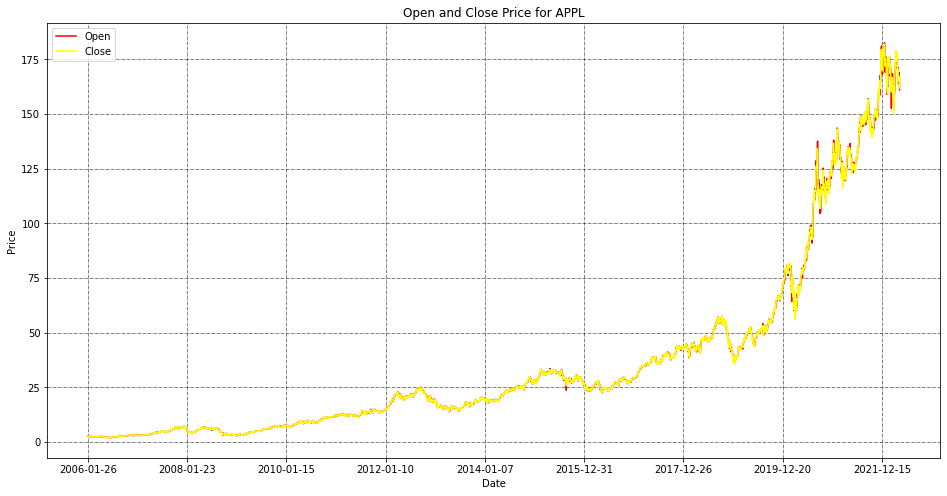

In [9]:
import matplotlib
import matplotlib.pyplot as plt

data['Open'].plot( figsize=(16, 8), c="red")
data['Close'].plot(c='yellow')

# Define the label for the title of the figure
plt.title("Open and Close Price for APPL")

# Define labels for x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("Price")

# Show legends
plt.legend()

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

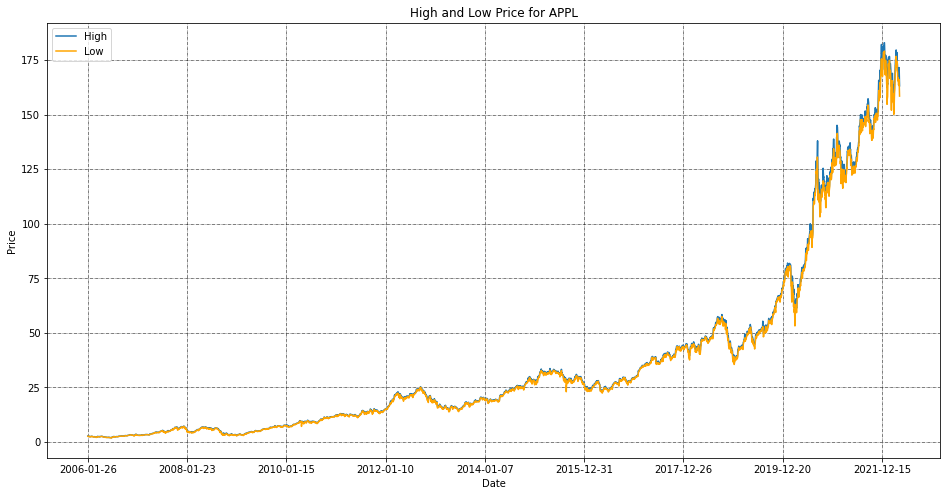

In [10]:
import matplotlib
import matplotlib.pyplot as plt

data['High'].plot( figsize=(16, 8))
data['Low'].plot(c="orange")

# Define the label for the title of the figure
plt.title("High and Low Price for APPL")

# Define labels for x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("Price")

# Show legends
plt.legend()

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

## Preparing data for training

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(['Close', 'Volume', 'Adj Close'], axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, shuffle=False)

X.shape

(4090, 3)

## Training a Linear Model

In [23]:
from sklearn.linear_model import LinearRegression

r = LinearRegression()

r.fit(X_train, y_train)

r.score(X_train, y_train)

0.999908009752533

### Cross-validation for performance evaluation

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(r, X_train, y_train, cv=5)

scores

array([0.99890492, 0.99968849, 0.99948625, 0.99958257, 0.99963693])

### Evaluating on test set


In [25]:
y_pred = r.predict(X_test)

y_pred

array([162.56100411, 164.4755987 , 164.14148317, 165.73171126,
       166.48892644, 163.4516406 , 161.40432262, 159.93940497,
       161.44479721, 157.03761546, 155.75188917, 152.61123751,
       154.43077767, 157.52258333, 159.79511427, 163.24612452,
       165.44190354, 168.30024509, 171.61873851, 172.9315586 ,
       174.07044948, 174.96834472, 178.26473725, 177.89966343,
       175.2410885 , 173.02170764, 177.71026869, 175.70388373,
       171.61604508, 171.91823972, 169.66480538, 166.40691396,
       168.42344739, 169.9358994 , 166.83119445, 165.82374229,
       166.4591495 , 166.69328137, 168.77427861, 163.80377674,
       160.74895054])

In [26]:
test_df = X_test
test_df["Actual"] = y_test
test_df["Prediction"] = y_pred

test_df

,Open,High,Low,Actual,Prediction
Date,,,,,
2022-02-25,163.839996,165.119995,160.869995,164.850006,162.561004
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.475599
2022-03-01,164.699997,166.600006,161.970001,163.199997,164.141483
2022-03-02,164.389999,167.360001,162.949997,166.559998,165.731711
2022-03-03,168.470001,168.910004,165.550003,166.229996,166.488926
2022-03-04,164.490005,165.550003,162.100006,163.169998,163.451641
2022-03-07,163.360001,165.020004,159.039993,159.300003,161.404323
2022-03-08,158.820007,162.880005,155.800003,157.440002,159.939405
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.444797


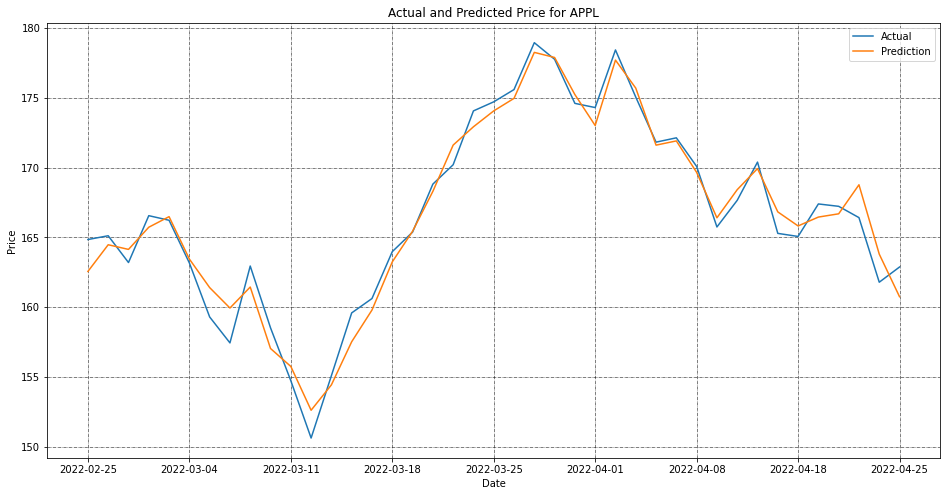

In [27]:
import matplotlib
import matplotlib.pyplot as plt

test_df["Actual"].plot(figsize=(16, 8))
test_df["Prediction"].plot()

# Define the label for the title of the figure
plt.title("Actual and Predicted Price for APPL")

# Define labels for x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("Price")

# Show legends
plt.legend()

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [20]:
X_train.shape

(2863, 3)